In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, spearmanr, skew, pearsonr
from sklearn.metrics import r2_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsClassifier

#SMOTE
from imblearn.over_sampling import SMOTE

#Mô hình XG Boost
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV

#Random Forest
from sklearn.ensemble import RandomForestClassifier

import joblib

In [19]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/Lending-Club-Loan.csv')
data

,loan_amnt,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,zip_code,addr_state,dti,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,profit
0,20000.0,8 years,MORTGAGE,150000.0,2016-03-01,Fully Paid,debt_consolidation,805xx,CO,14.90,...,0.0,4.0,97.9,50.0,0.0,148529.0,131448.0,42200.0,92229.0,1407.091278
1,10000.0,2 years,MORTGAGE,32000.0,2016-03-01,Fully Paid,debt_consolidation,180xx,PA,14.59,...,0.0,2.0,100.0,5.9,0.0,45200.0,13329.0,41200.0,0.0,1258.436374
2,5000.0,4 years,MORTGAGE,100000.0,2016-01-01,Fully Paid,moving,402xx,KY,18.53,...,0.0,1.0,100.0,100.0,0.0,270840.0,46463.0,31800.0,30740.0,871.200692
3,16700.0,NaN,MORTGAGE,64000.0,2016-02-01,Fully Paid,credit_card,850xx,AZ,7.91,...,0.0,3.0,83.3,33.3,0.0,294800.0,14911.0,19000.0,0.0,1997.848136
4,5500.0,2 years,MORTGAGE,31000.0,2016-03-01,Fully Paid,credit_card,809xx,CO,17.31,...,0.0,1.0,100.0,100.0,0.0,178109.0,23331.0,2900.0,19338.0,145.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110040,18000.0,2 years,RENT,63000.0,2016-03-01,Fully Paid,debt_consolidation,900xx,CA,14.06,...,0.0,0.0,100.0,71.4,0.0,31439.0,16303.0,11400.0,16481.0,1164.474772
110041,4375.0,10+ years,RENT,86700.0,2016-01-01,Fully Paid,debt_consolidation,981xx,WA,6.80,...,0.0,3.0,100.0,25.0,0.0,29900.0,20857.0,4900.0,18500.0,1142.346794
110042,16000.0,4 years,OWN,80000.0,2016-03-01,Fully Paid,debt_consolidation,776xx,TX,13.70,...,0.0,0.0,78.6,100.0,0.0,88680.0,43916.0,6500.0,50680.0,1335.994282
110043,7500.0,10+ years,OWN,24000.0,2016-03-01,Fully Paid,credit_card,486xx,MI,27.00,...,0.0,3.0,100.0,33.3,0.0,42600.0,14699.0,25100.0,10700.0,902.468723


In [20]:
#Chuyển 2 columns là issue_d và earliest_cr_line sang dạng datetime:
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%Y-%m-%d')
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%Y-%m-%d')

data['loan_approval_days'] = (data['issue_d'] - data['earliest_cr_line']).dt.days
data = data.drop(columns = ['issue_d', 'earliest_cr_line'])

# **OUTLIERS DROPPING**

In [21]:
for i in data.columns:
  print(i, data[i].isnull().sum())

loan_amnt 0
emp_length 7615
home_ownership 0
annual_inc 0
loan_status 0
purpose 0
zip_code 0
addr_state 0
dti 7
delinq_2yrs 0
fico_range_low 0
fico_range_high 0
inq_last_6mths 0
mths_since_last_delinq 53323
mths_since_last_record 93080
open_acc 0
pub_rec 0
revol_bal 0
revol_util 71
total_acc 0
initial_list_status 0
mths_since_last_major_derog 79650
tot_coll_amt 60
tot_cur_bal 60
total_rev_hi_lim 60
acc_open_past_24mths 0
avg_cur_bal 60
bc_open_to_buy 986
bc_util 1051
mo_sin_old_il_acct 3898
mo_sin_old_rev_tl_op 61
mo_sin_rcnt_rev_tl_op 61
mo_sin_rcnt_tl 60
mort_acc 0
mths_since_recent_bc 907
mths_since_recent_bc_dlq 81885
mths_since_recent_inq 12038
mths_since_recent_revol_delinq 70664
num_accts_ever_120_pd 60
num_actv_bc_tl 60
num_actv_rev_tl 60
num_bc_sats 0
num_bc_tl 60
num_il_tl 60
num_op_rev_tl 60
num_rev_accts 60
num_rev_tl_bal_gt_0 60
num_sats 0
num_tl_120dpd_2m 4839
num_tl_30dpd 60
num_tl_90g_dpd_24m 60
num_tl_op_past_12m 60
pct_tl_nvr_dlq 60
percent_bc_gt_75 1003
pub_rec_bankr

In [22]:
def data_pre_cleaning(data):
  null_cols_to_be_dropped = []
  for i in data.columns:
    if data[i].isnull().sum() > int(0.40*data.shape[0]):
      null_cols_to_be_dropped.append(i)
  data = data.drop(null_cols_to_be_dropped, axis=1)

  for i in data.columns:
    if data[i].isnull().sum() < 10000:
      data = data.dropna(subset=[i])

  return data

data = data_pre_cleaning(data)

In [23]:
#column bị null còn sót lại là 'mths_since_recent_inq' sẽ được bù null bằng cách tính trung bình:
data['mths_since_recent_inq'] = data['mths_since_recent_inq'].fillna(data['mths_since_recent_inq'].mean())

In [24]:
data

,loan_amnt,emp_length,home_ownership,annual_inc,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,profit,loan_approval_days
0,20000.0,8 years,MORTGAGE,150000.0,Fully Paid,debt_consolidation,805xx,CO,14.90,0.0,...,4.0,97.9,50.0,0.0,148529.0,131448.0,42200.0,92229.0,1407.091278,3865
1,10000.0,2 years,MORTGAGE,32000.0,Fully Paid,debt_consolidation,180xx,PA,14.59,0.0,...,2.0,100.0,5.9,0.0,45200.0,13329.0,41200.0,0.0,1258.436374,3773
2,5000.0,4 years,MORTGAGE,100000.0,Fully Paid,moving,402xx,KY,18.53,0.0,...,1.0,100.0,100.0,0.0,270840.0,46463.0,31800.0,30740.0,871.200692,5023
4,5500.0,2 years,MORTGAGE,31000.0,Fully Paid,credit_card,809xx,CO,17.31,0.0,...,1.0,100.0,100.0,0.0,178109.0,23331.0,2900.0,19338.0,145.320000,3592
5,8000.0,10+ years,MORTGAGE,56791.0,Fully Paid,debt_consolidation,229xx,VA,27.49,0.0,...,1.0,100.0,25.0,0.0,58869.0,35978.0,26500.0,26569.0,1215.557083,8705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110040,18000.0,2 years,RENT,63000.0,Fully Paid,debt_consolidation,900xx,CA,14.06,0.0,...,0.0,100.0,71.4,0.0,31439.0,16303.0,11400.0,16481.0,1164.474772,4688
110041,4375.0,10+ years,RENT,86700.0,Fully Paid,debt_consolidation,981xx,WA,6.80,0.0,...,3.0,100.0,25.0,0.0,29900.0,20857.0,4900.0,18500.0,1142.346794,5266
110042,16000.0,4 years,OWN,80000.0,Fully Paid,debt_consolidation,776xx,TX,13.70,0.0,...,0.0,78.6,100.0,0.0,88680.0,43916.0,6500.0,50680.0,1335.994282,6179
110043,7500.0,10+ years,OWN,24000.0,Fully Paid,credit_card,486xx,MI,27.00,0.0,...,3.0,100.0,33.3,0.0,42600.0,14699.0,25100.0,10700.0,902.468723,3743


In [25]:
def detect_cols_types(data):
  category_cols = []
  numeric_cols = []
  for i in data.columns:
    if data[i].dtype == 'object':
      category_cols.append(i)
    elif len(data[i].unique()) < 30:
      category_cols.append(i)
    else:
      numeric_cols.append(i)
  return category_cols, numeric_cols

category_cols, numeric_cols = detect_cols_types(data)

In [26]:
def detect_skews(data):
  IQR_list = []
  Z_score_list = []

  for i in numeric_cols:
    skew_value = data[i].skew()
    print(i, skew_value)
    if skew_value > 15 or skew_value < -15:
      IQR_list.append(i)
    elif skew_value > -0.5 and skew_value < 0.5:
      Z_score_list.append(i)
  print('IQR_list', IQR_list)
  print('Z_score_list', Z_score_list)
  return IQR_list, Z_score_list # Add this line to return the lists

IQR_list, Z_score_list = detect_skews(data)

loan_amnt 0.9567574469062664
annual_inc 40.5589626135178
dti 1.059524758836368
fico_range_low 1.3031284094032747
fico_range_high 1.30340275588688
open_acc 1.2752488791044945
revol_bal 9.108696844849751
revol_util -0.04257085714374402
total_acc 0.9988806923252577
tot_coll_amt 40.21929489620183
tot_cur_bal 3.1345629792609313
total_rev_hi_lim 5.249132329205275
acc_open_past_24mths 1.4463694861777059
avg_cur_bal 3.8204077395385765
bc_open_to_buy 3.8654135923616235
bc_util -0.340576004425681
mo_sin_old_il_acct 0.3225880597153806
mo_sin_old_rev_tl_op 0.997212443787837
mo_sin_rcnt_rev_tl_op 3.3372738405317506
mo_sin_rcnt_tl 3.794979783730996
mths_since_recent_bc 3.220385452042812
num_accts_ever_120_pd 5.053224383739023
num_actv_rev_tl 1.4383231015029436
num_bc_sats 1.4966191970759195
num_bc_tl 1.3300887639138368
num_il_tl 2.1887554177987134
num_op_rev_tl 1.4389338845515687
num_rev_accts 1.250542824775252
num_rev_tl_bal_gt_0 1.4435207199508588
num_sats 1.2766030174555276
pct_tl_nvr_dlq -2.2377

In [27]:
#Tính toán IQR cho dữ liệu phân phối không chuẩn
for i in IQR_list:
  #tính toán IQR thông qua Q1,
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1

  # Xác định ngưỡng cho giá trị ngoại lệ
  lower_bound = Q1 - 4 * IQR
  upper_bound = Q3 + 4 * IQR

  # Nếu bạn muốn loại bỏ các giá trị ngoại lệ
  data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)]

print("Dữ liệu sau khi loại bỏ Outliers sử dụng IQR:")
print(data.shape)

Dữ liệu sau khi loại bỏ Outliers sử dụng IQR:
(78517, 56)


In [28]:
#Z-score cho phân phối chuẩn:
threshold = 3  # Xác định ngưỡng cho outlier

for i in Z_score_list:
  data.loc[:, 'z_score'] = zscore(data[i])   # Tính Z-score cho cột hiện tại
  data = data[(data['z_score'] <= threshold) & (data['z_score'] >= -threshold)]

# Loại bỏ cột 'z_score' sau khi lọc
data = data.drop(columns=['z_score'])

print("Dữ liệu sau khi loại bỏ các ngoại lệ bằng phương pháp Z-score:")
print(data.shape)

Dữ liệu sau khi loại bỏ các ngoại lệ bằng phương pháp Z-score:
(77925, 56)


# **EDA**

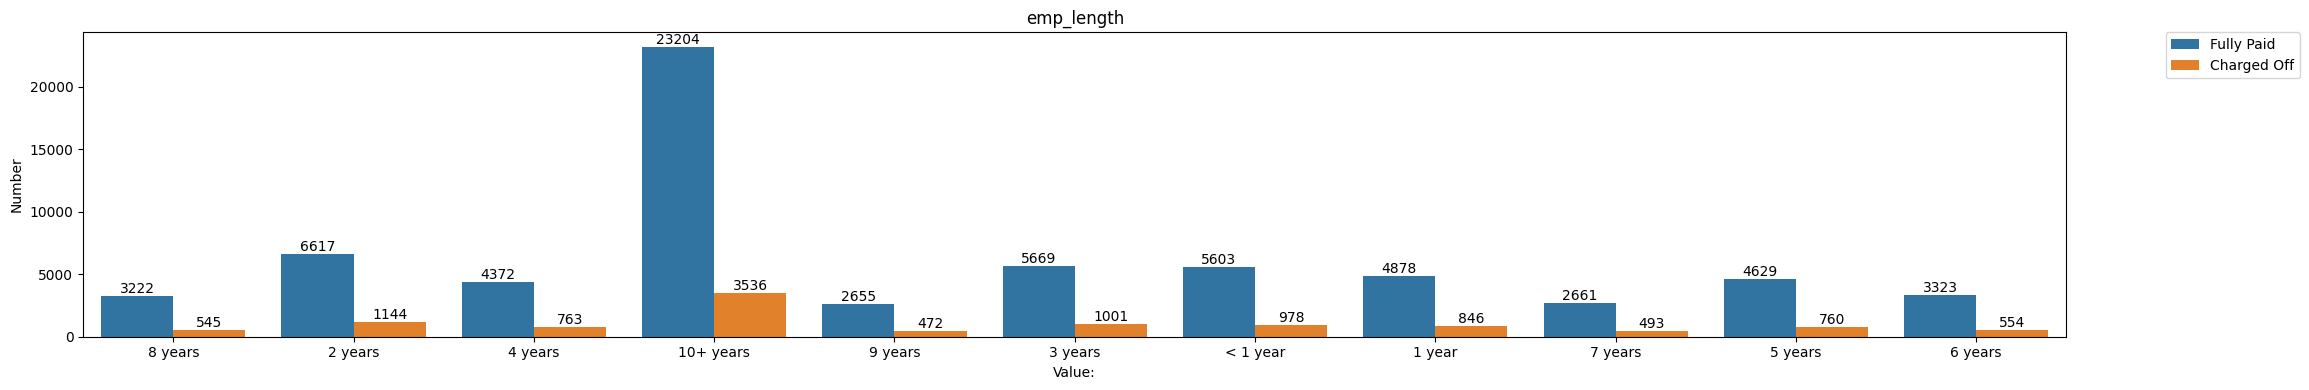

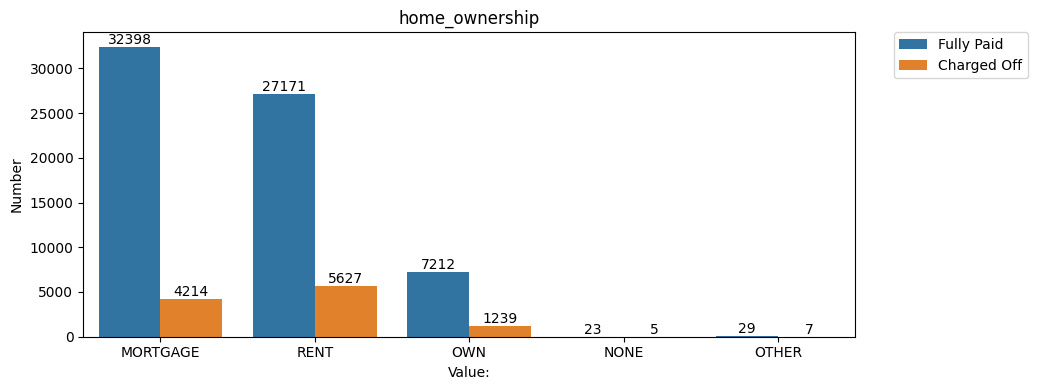

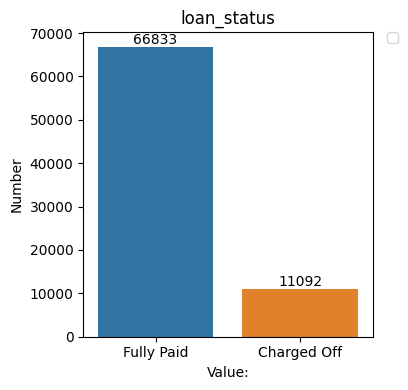

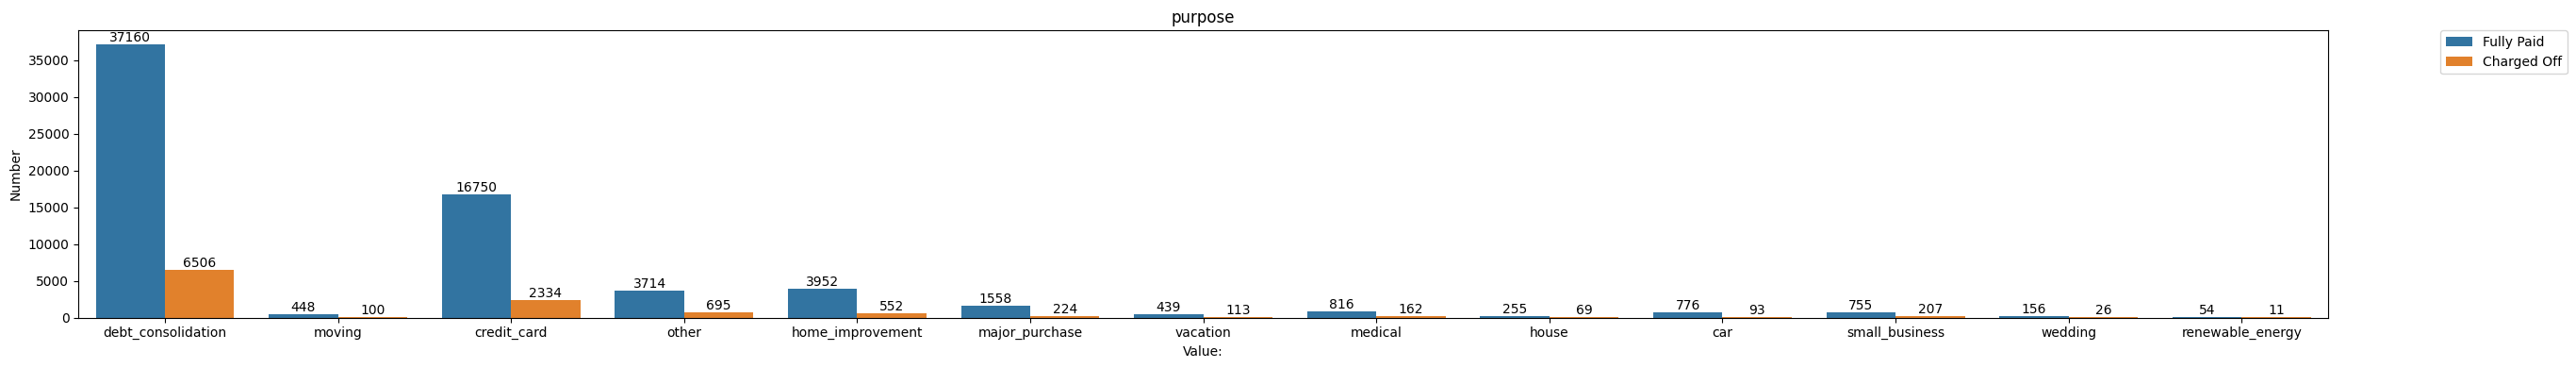

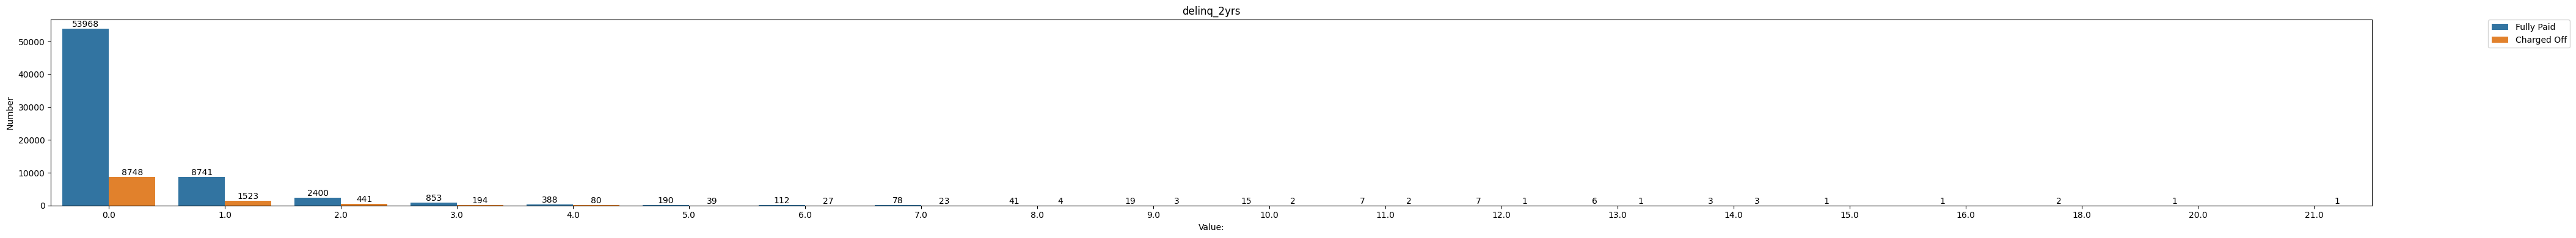

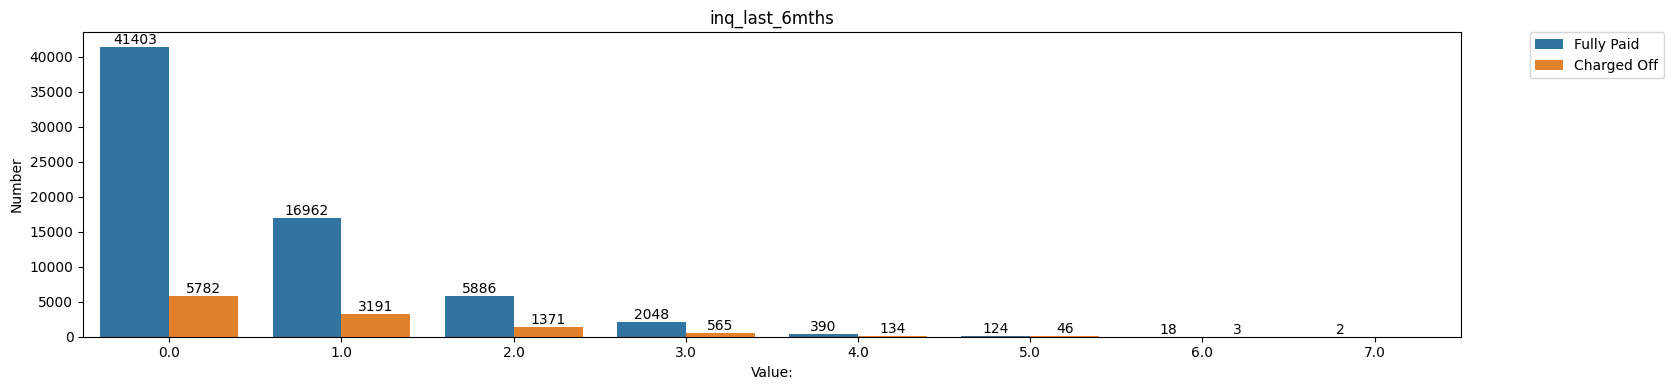

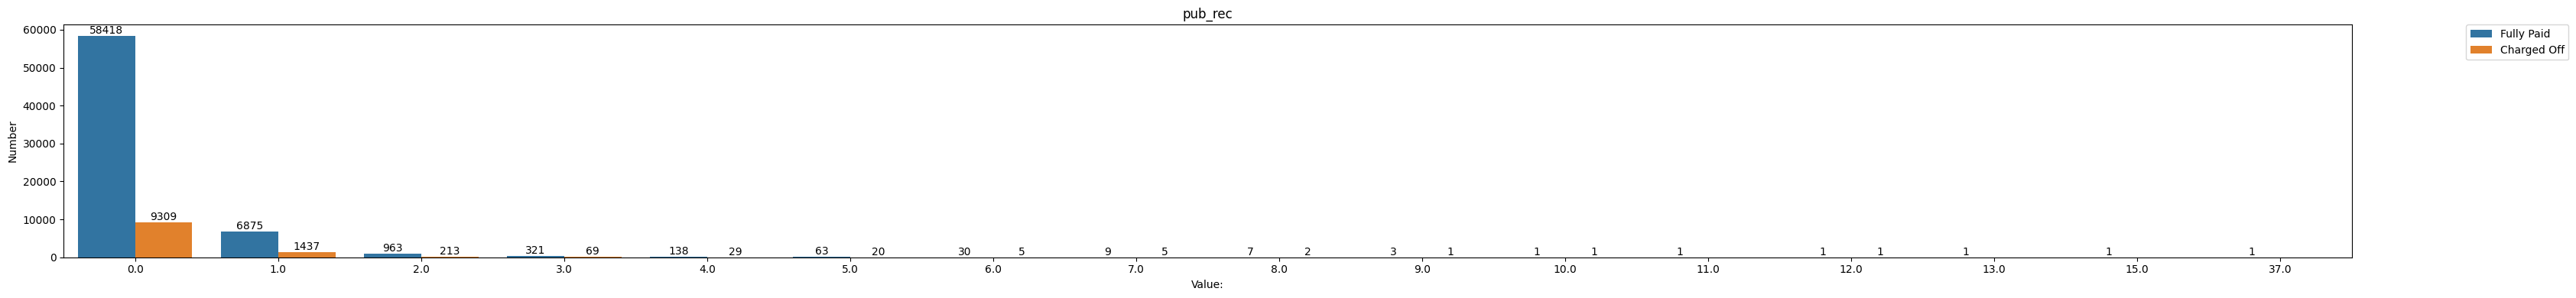

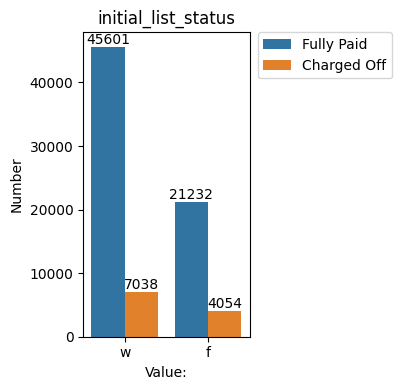

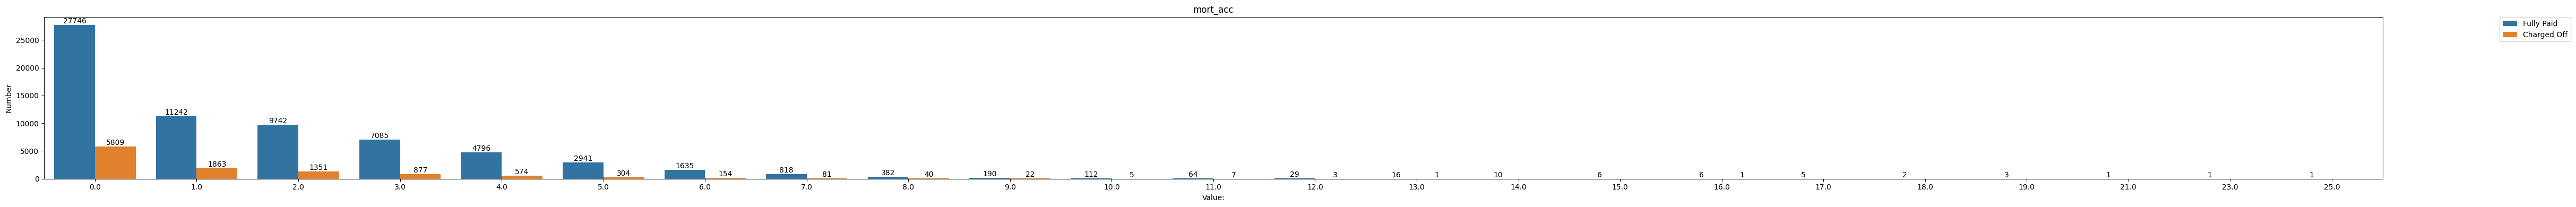

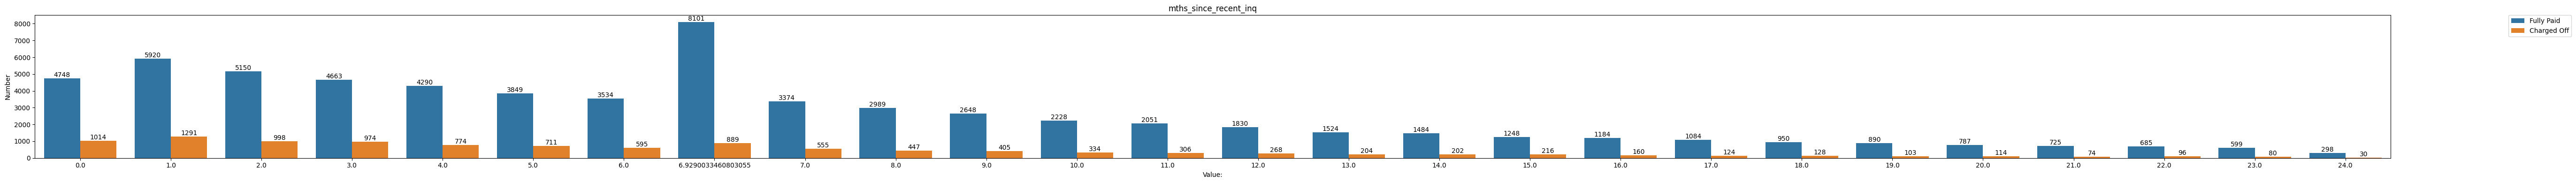

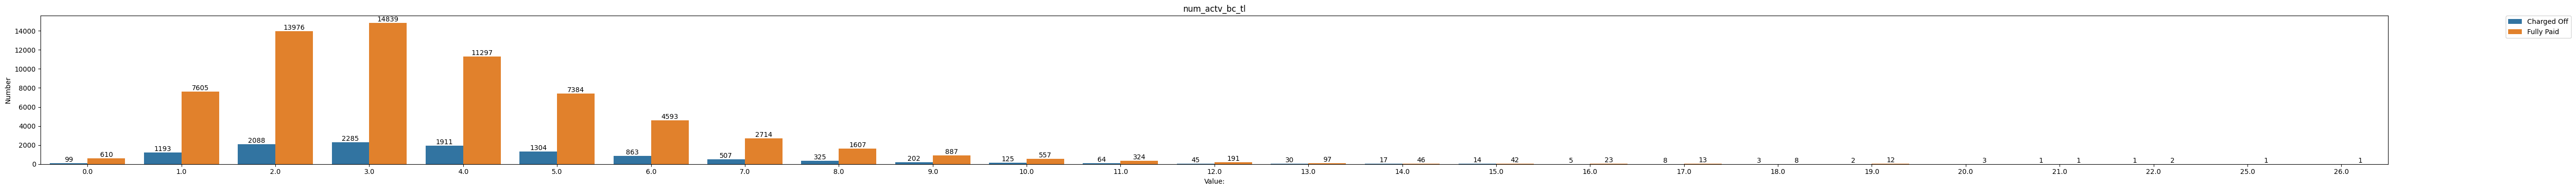

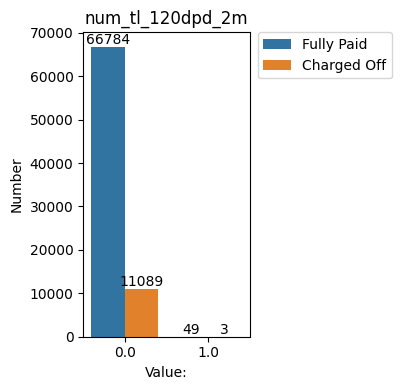

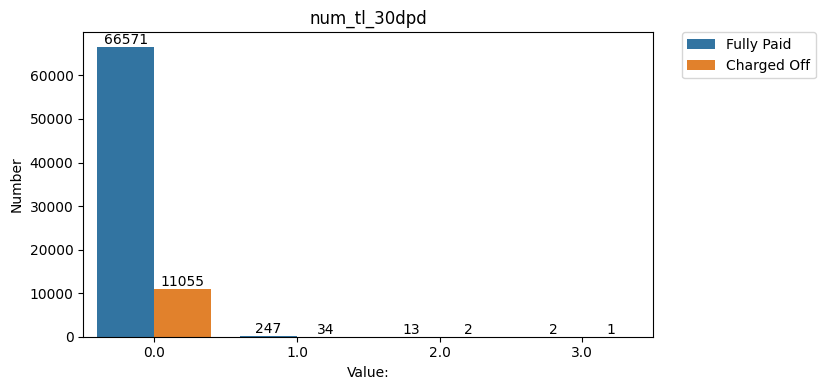

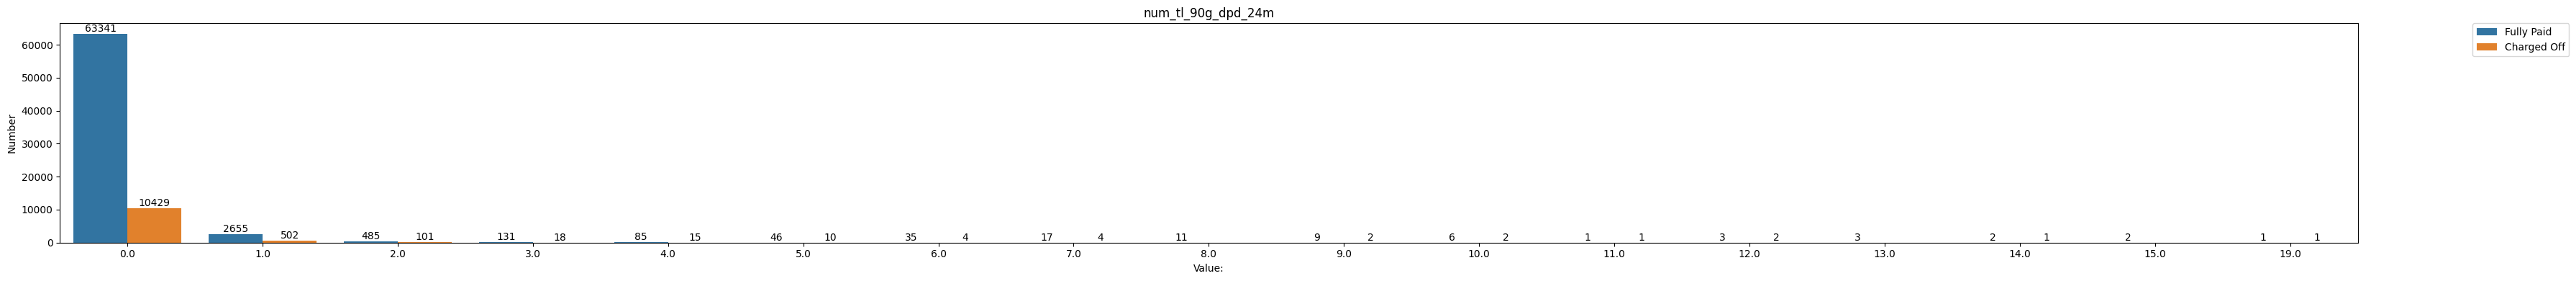

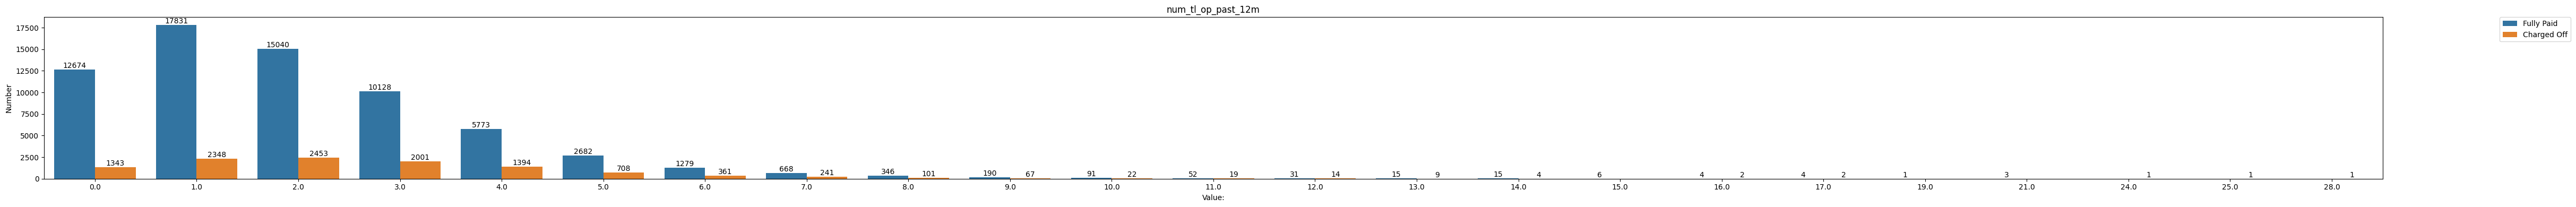

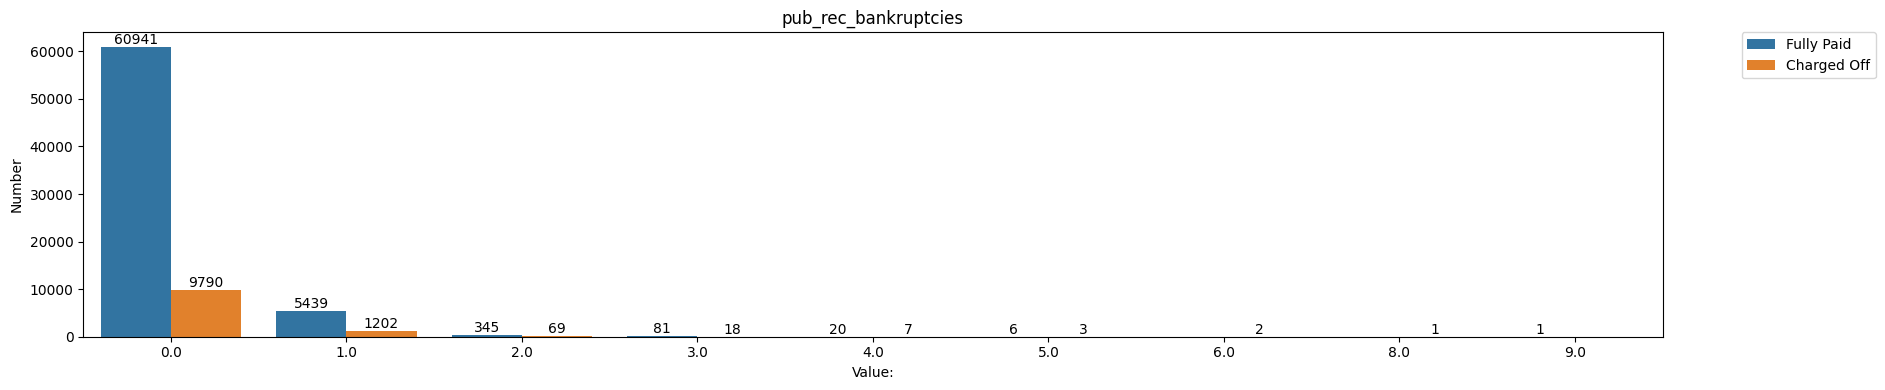

In [29]:
for i in category_cols:
  if i == 'zip_code' or i == 'addr_state':
    continue
  else:
    ax1 = sns.countplot(x=i, hue='loan_status', data=data)
    ax1.set_xlabel('Value:')
    ax1.set_ylabel('Number')
    ax1.set_title(i)
    plt.gcf().set_size_inches(len(data[i].unique()) * 2.1, 4)

    for container in ax1.containers:
      ax1.bar_label(container)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.tight_layout()
    plt.show()

<ipython-input-30-fdae033cfeaf>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,5))


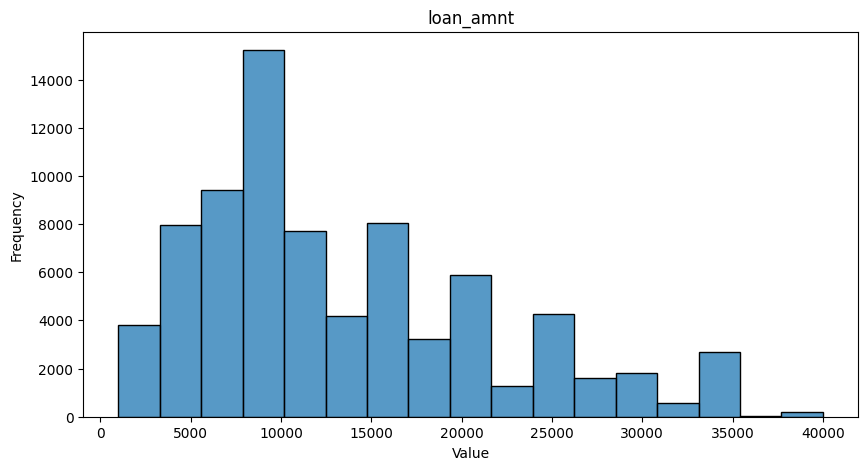

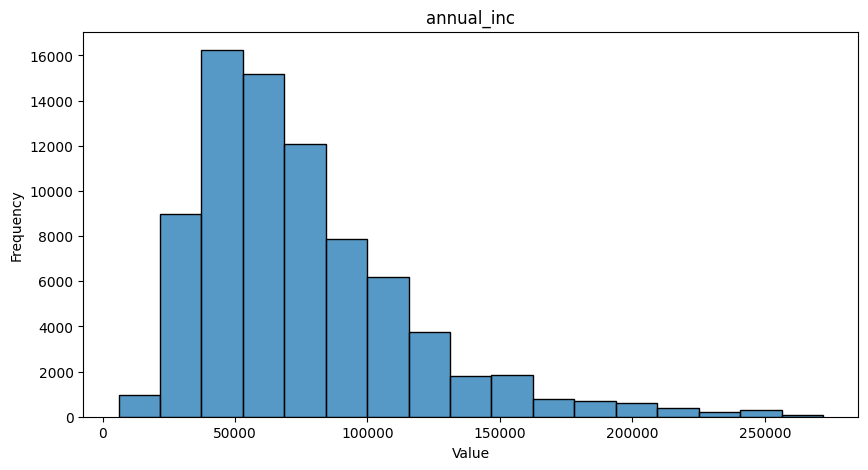

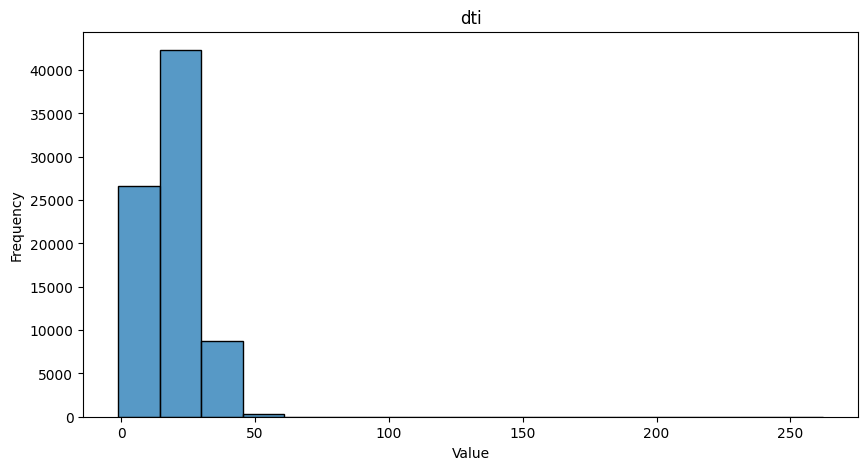

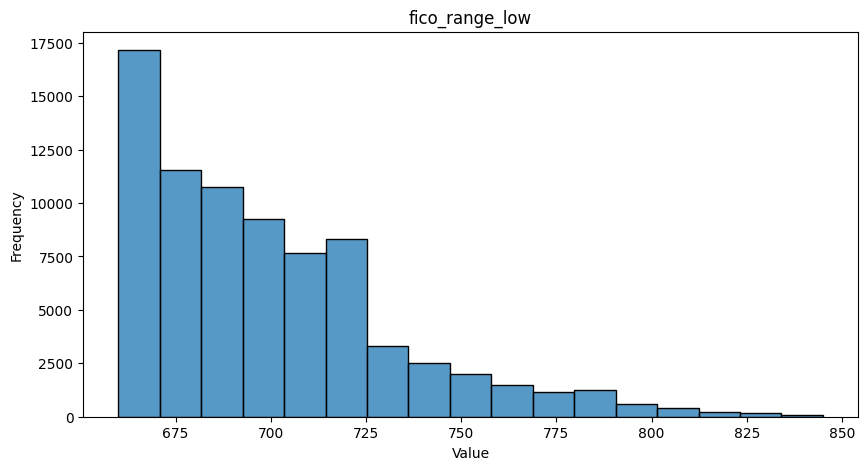

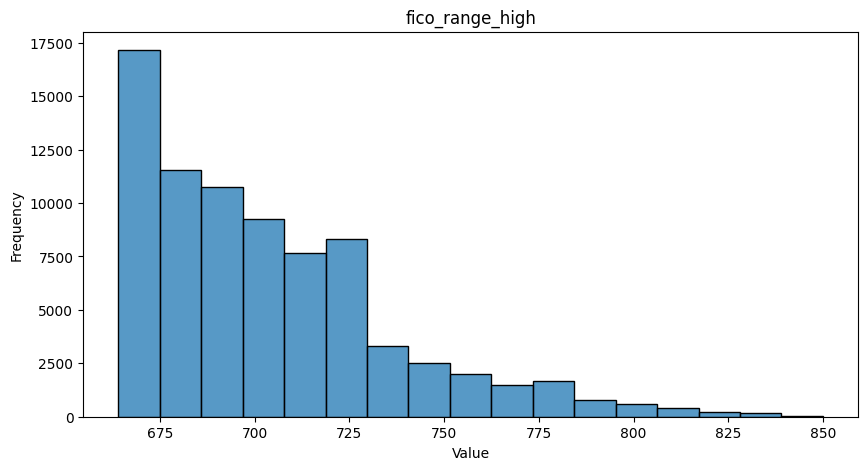

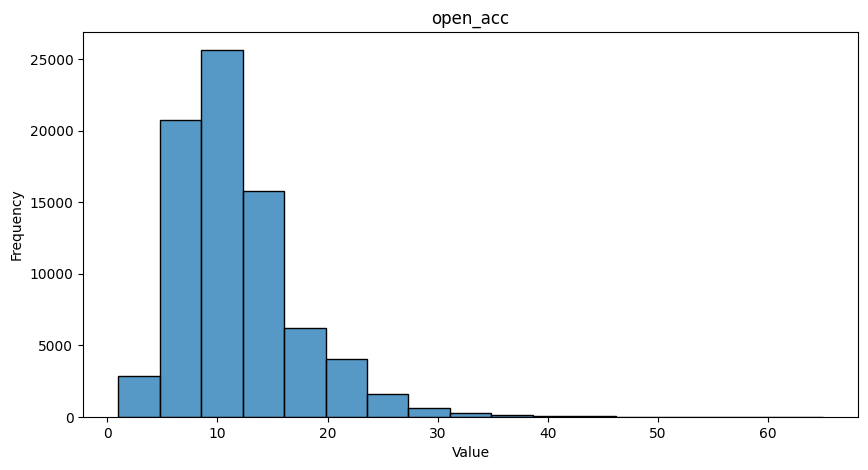

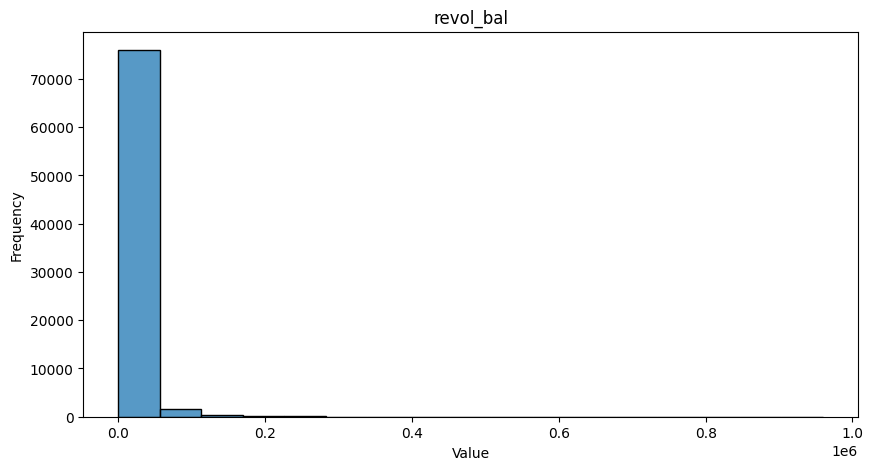

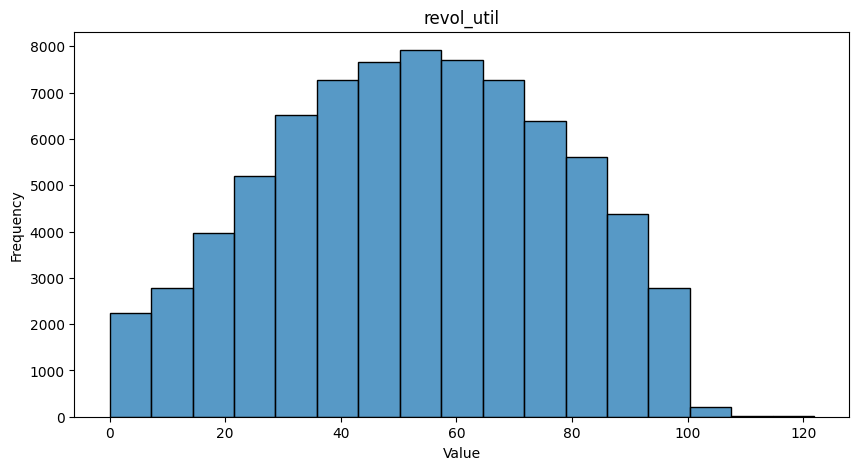

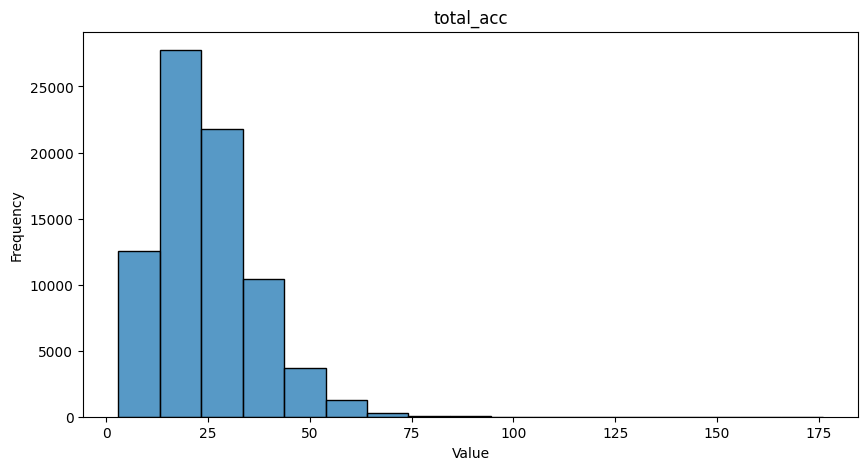

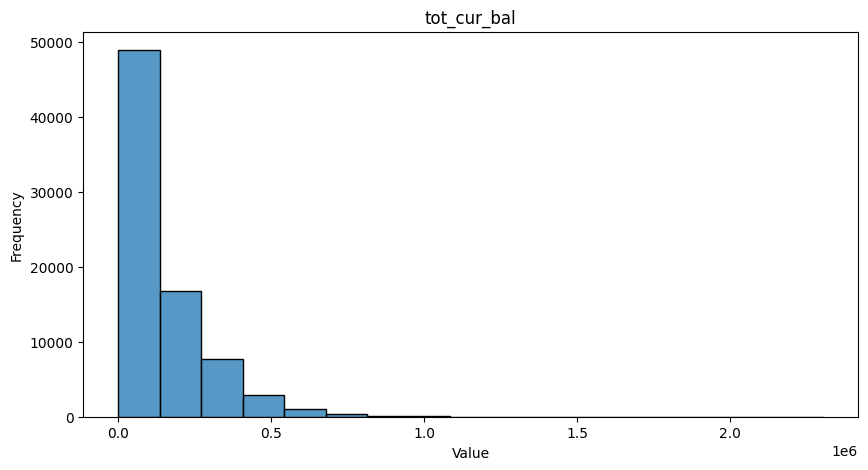

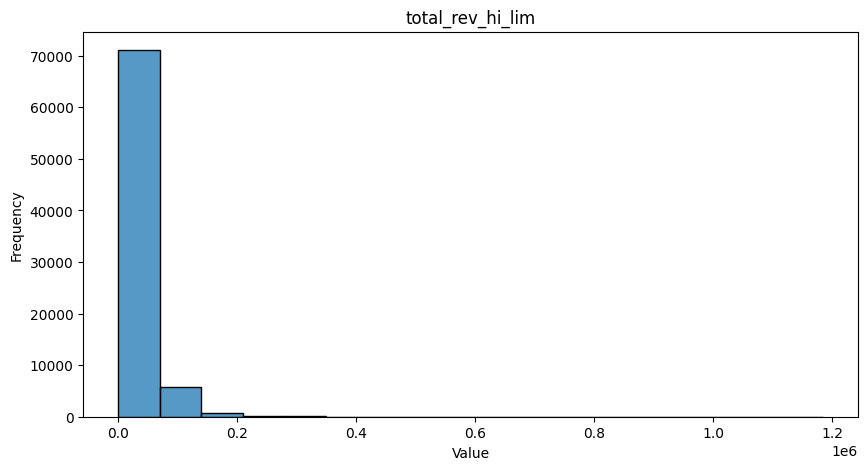

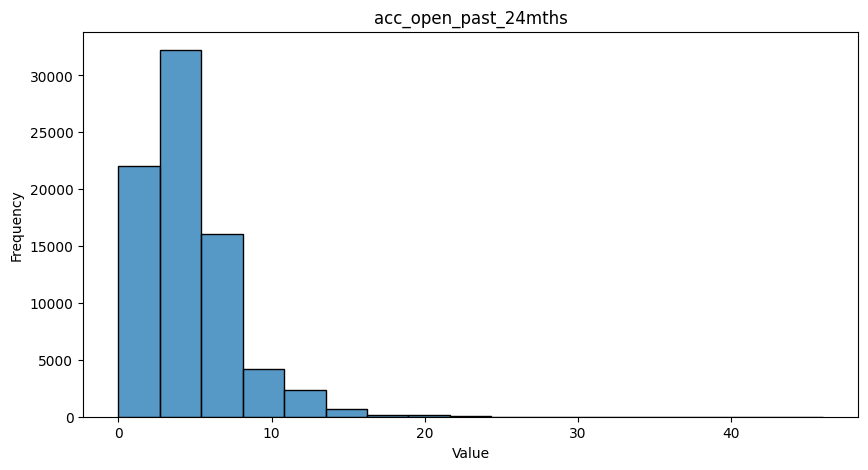

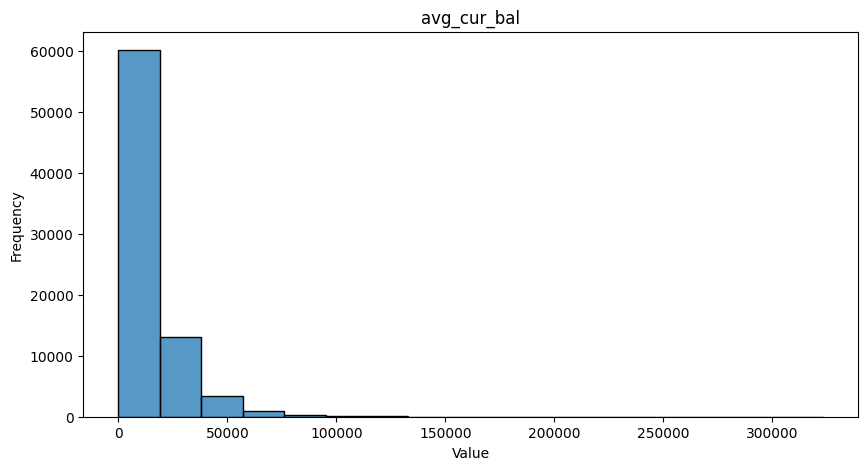

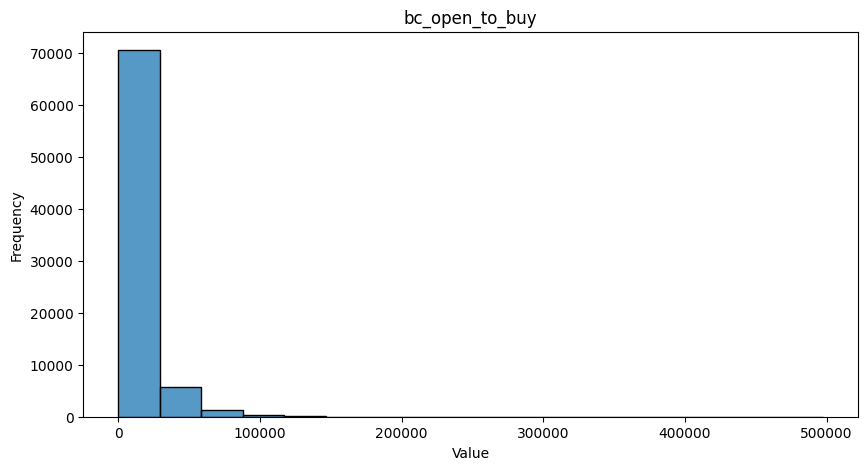

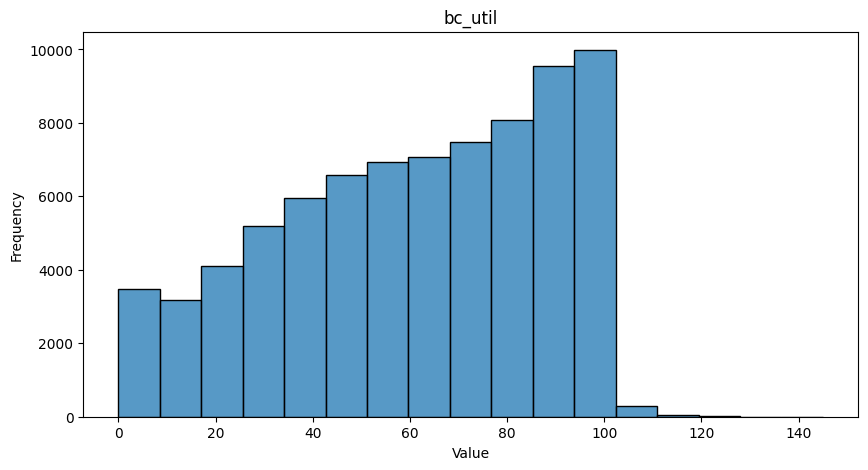

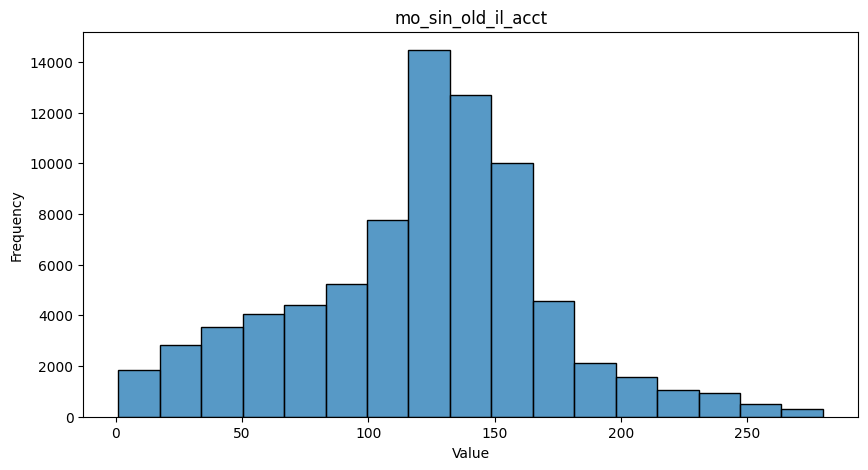

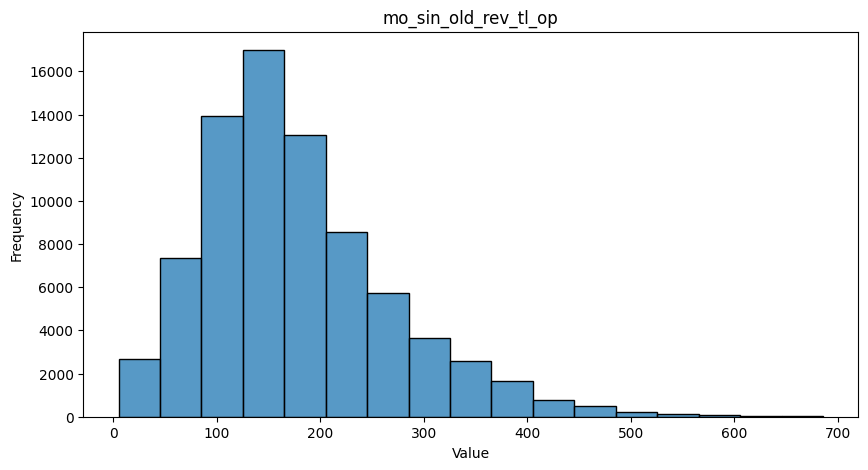

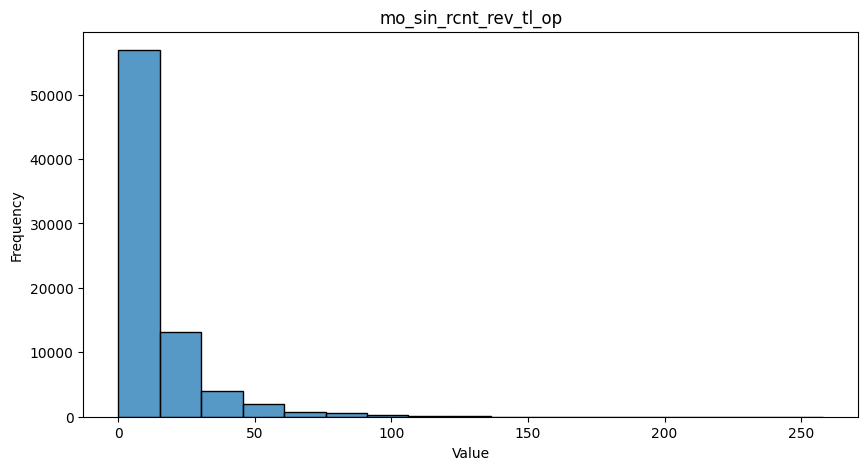

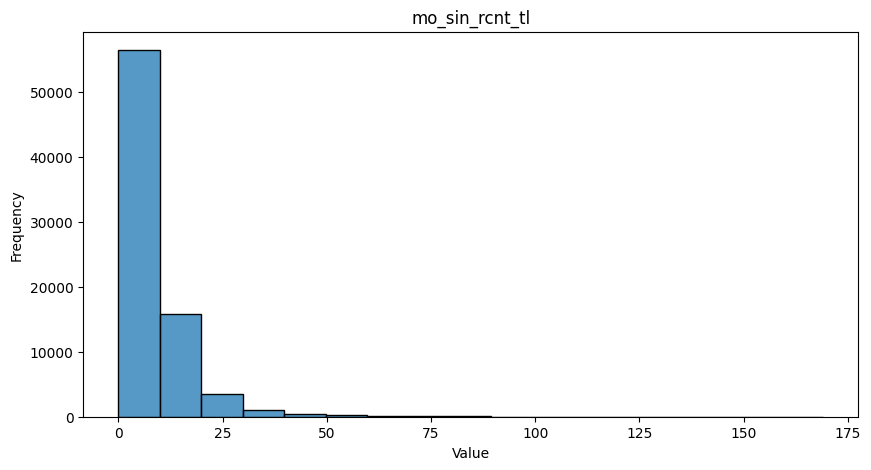

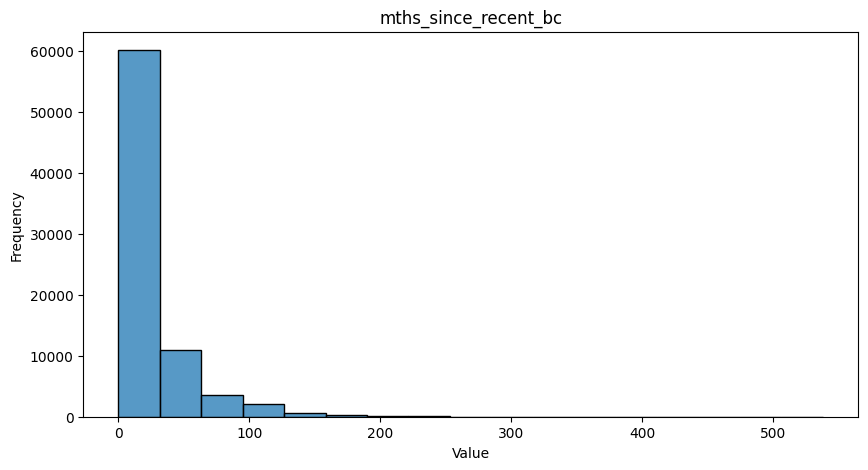

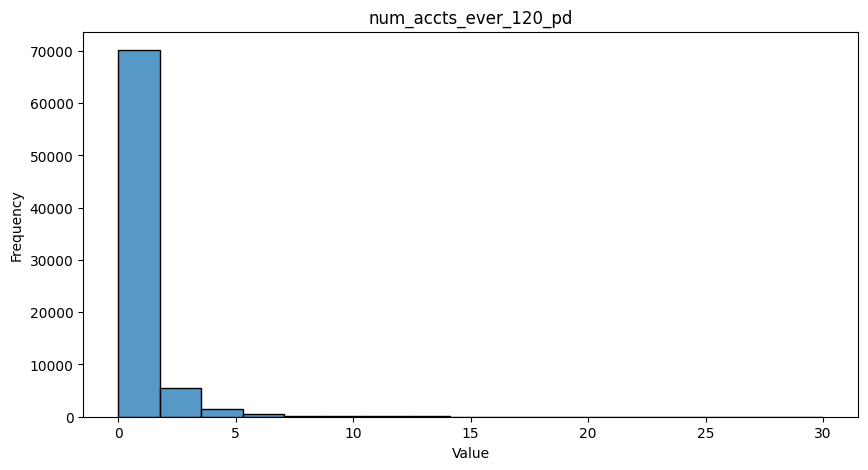

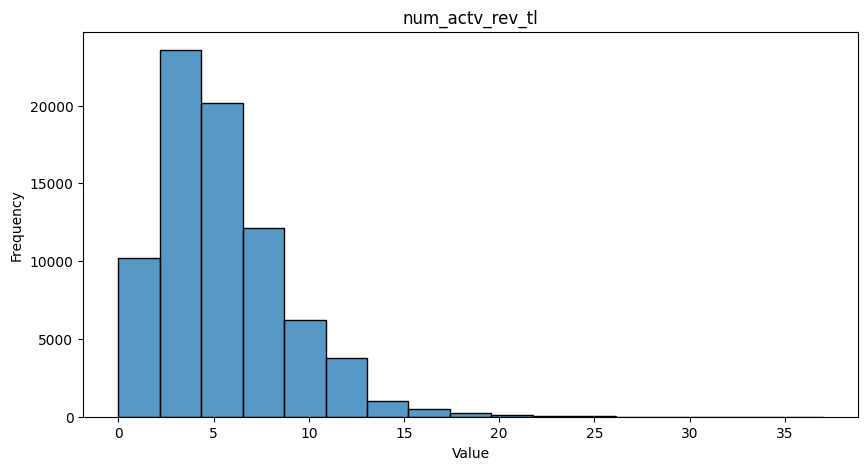

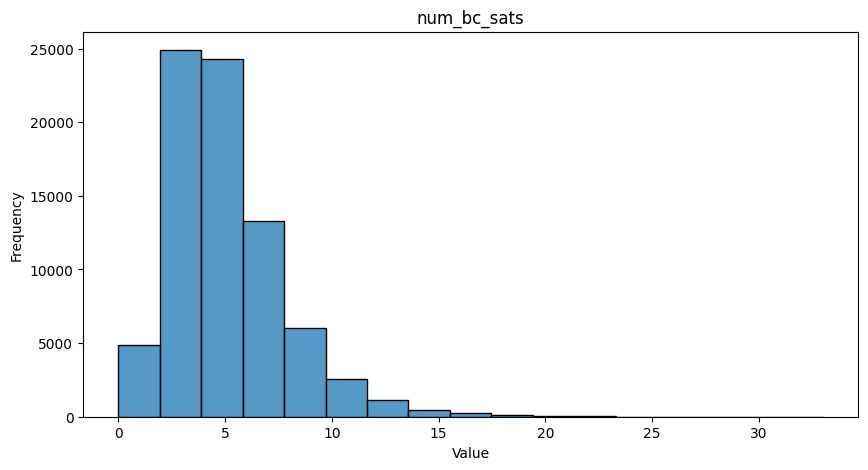

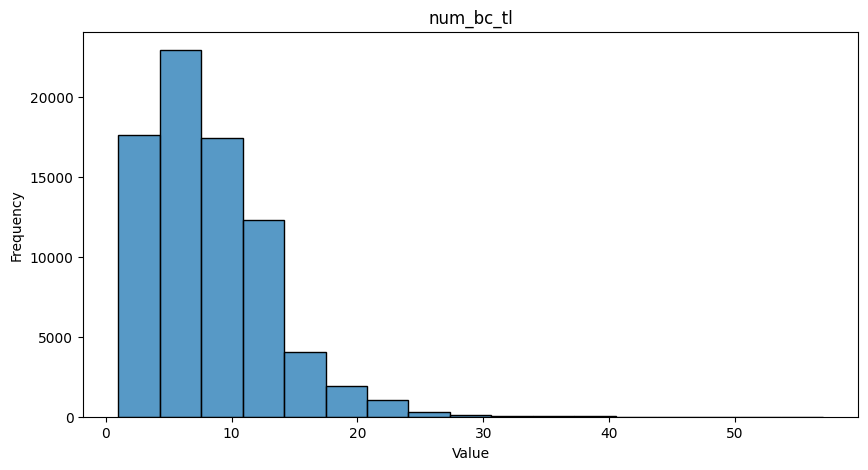

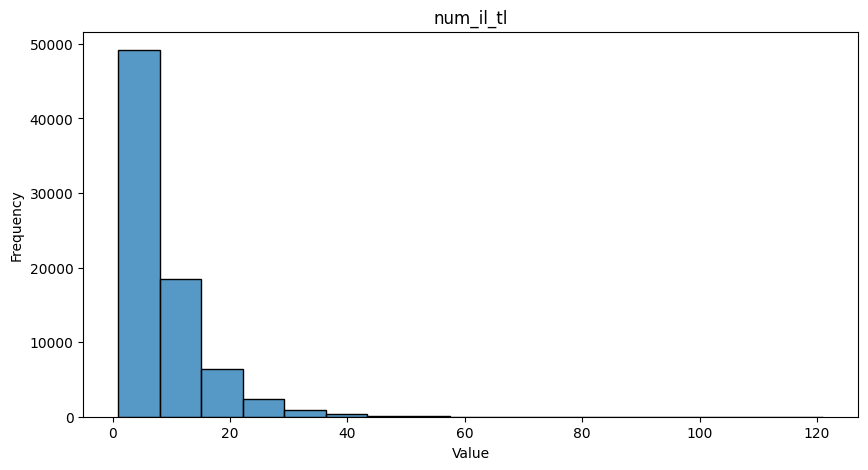

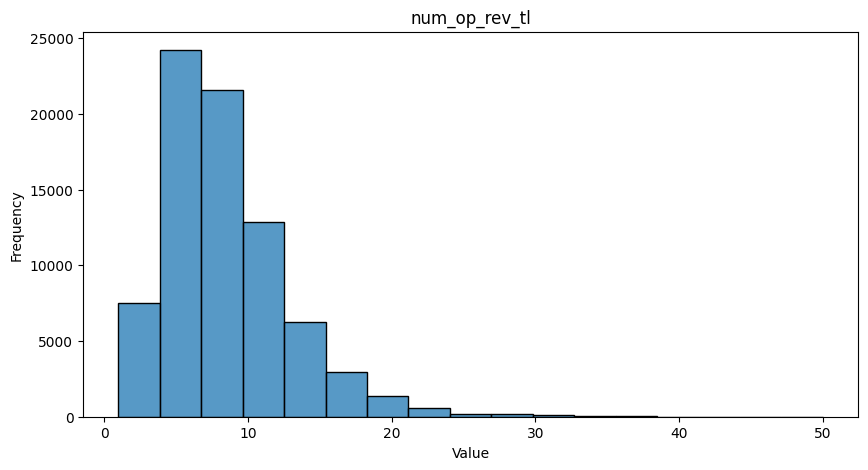

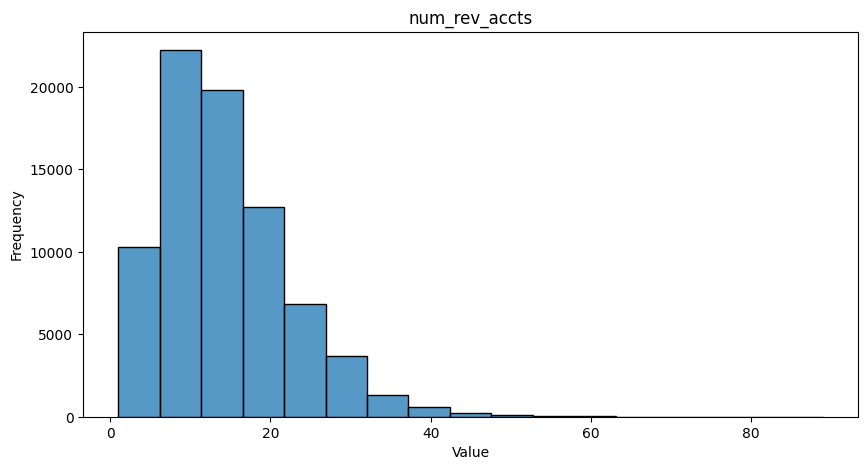

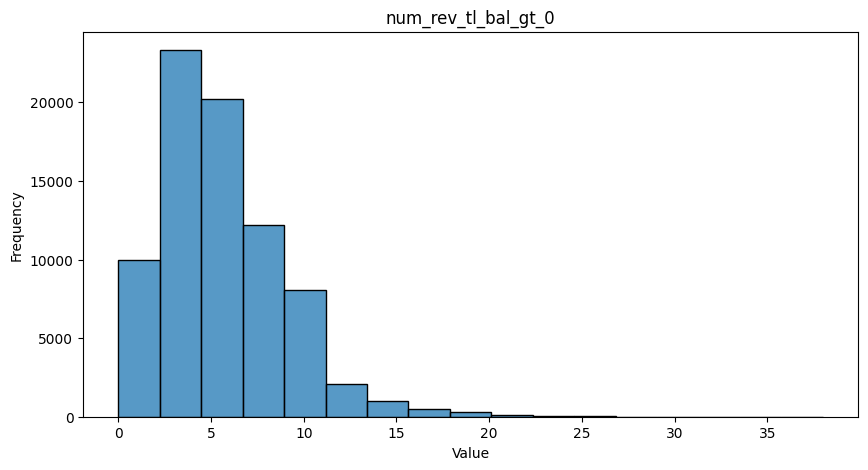

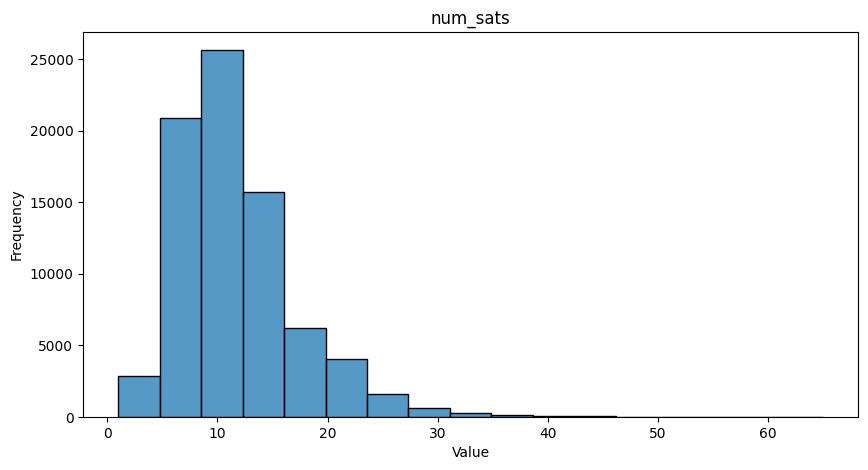

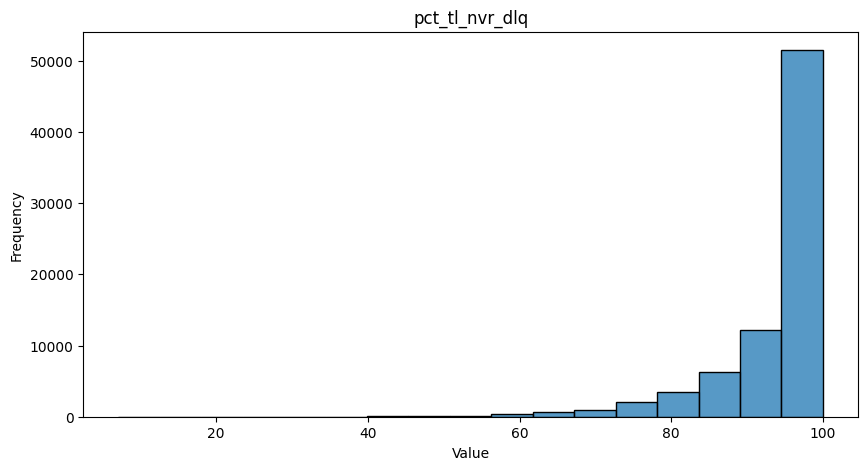

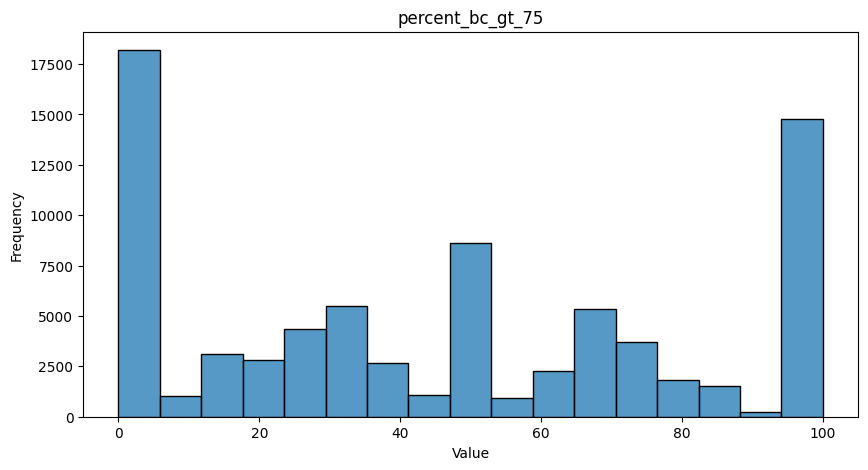

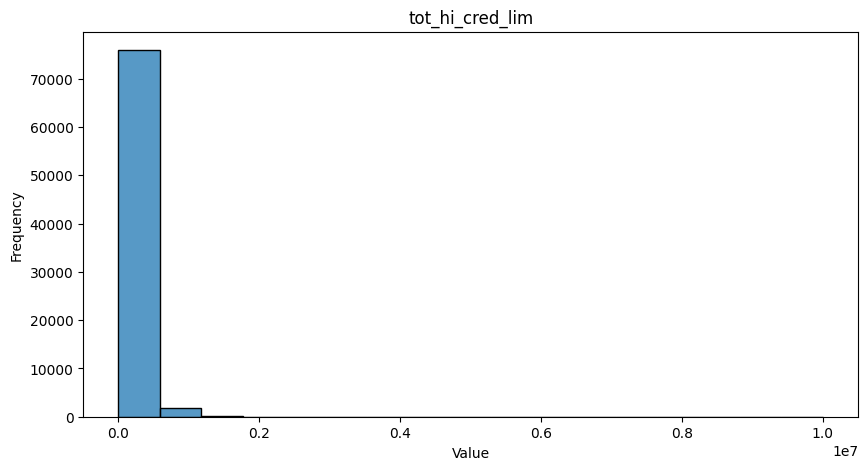

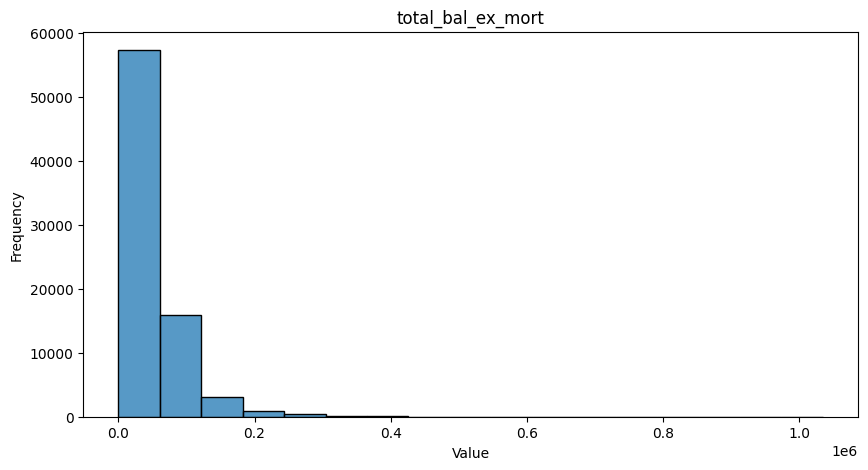

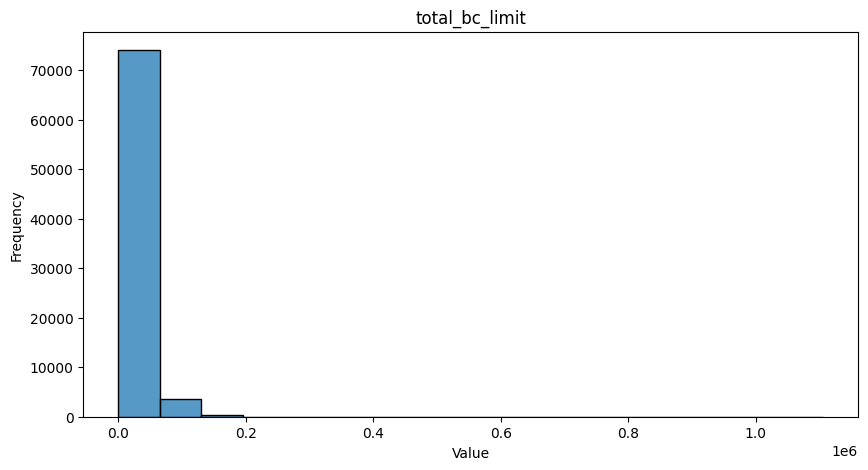

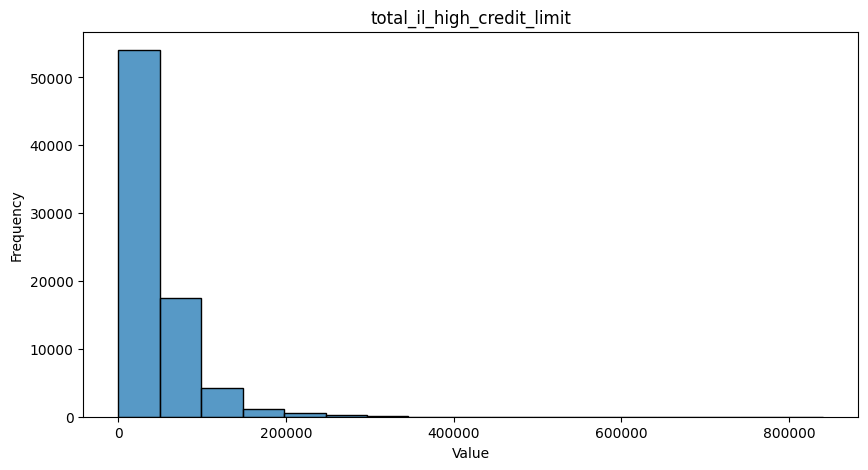

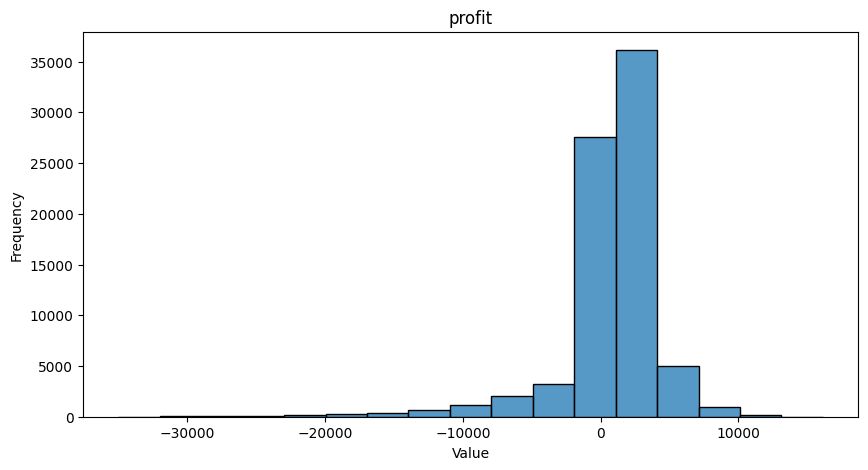

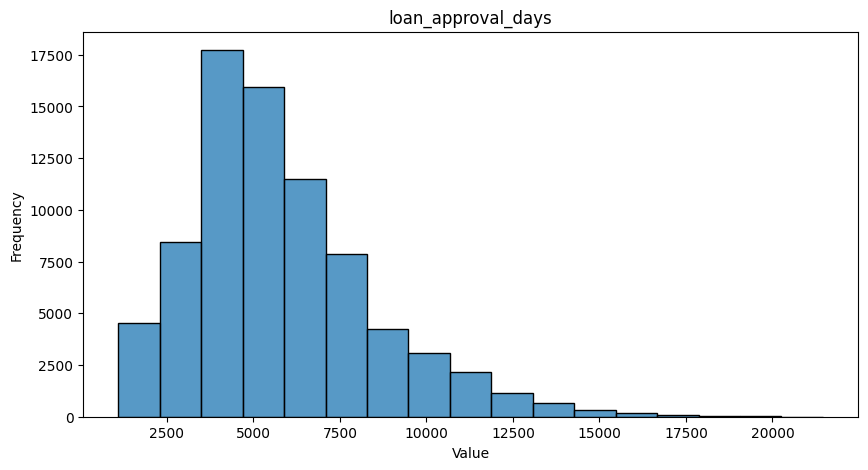

In [30]:
data = data.drop(columns = ['tot_coll_amt'])
numeric_cols.remove('tot_coll_amt') #Xóa đi vì cột này chỉ có 1 giá trị

for i in numeric_cols:
  plt.figure(figsize=(10,5))
  ax2 = sns.histplot(data[i], bins=17)
  ax2.set_xlabel('Value')
  ax2.set_ylabel('Frequency')
  ax2.set_title(i)

# **FEATURES SELECTION--EDA-ENCODING**

***Kiểm định Chi-squared***

In [31]:
remove_chi_squared_cols =[]

#Chi-square test cho các cột Object so với cột Output của data
for i in category_cols:
  if i == 'loan_status':
    continue
  else:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(data[i], data['loan_status']))
    print(i, '---', pval)
    if pval > 0.05:
      remove_chi_squared_cols.append(i)
    else:
      continue
print(remove_chi_squared_cols)

emp_length --- 1.9852794699917782e-05
home_ownership --- 4.909289837935081e-97
purpose --- 5.2071129111567654e-36
zip_code --- 3.3222280585035396e-07
addr_state --- 1.8455103539379278e-22
delinq_2yrs --- 2.0043793801659947e-05
inq_last_6mths --- 1.0574467275947192e-107
pub_rec --- 2.6844847655876294e-17
initial_list_status --- 2.590360788126021e-23
mort_acc --- 2.8594870785505027e-108
mths_since_recent_inq --- 4.712703752098353e-79
num_actv_bc_tl --- 6.312019274662454e-18
num_tl_120dpd_2m --- 0.1213547451697201
num_tl_30dpd --- 0.5810882060474678
num_tl_90g_dpd_24m --- 0.060528788209671655
num_tl_op_past_12m --- 2.2338590994718306e-197
pub_rec_bankruptcies --- 1.1103086101690554e-21
['num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m']


In [32]:
data = data.drop(columns = remove_chi_squared_cols)

***Kiểm định Spearman cho các columns số***

In [36]:
spearman_df = data[numeric_cols]
spearman_df.loc[:, 'loan_status'] = data['loan_status']

correlation_results = []

# Duyệt qua tất cả các cột trong DataFrame
for col in spearman_df.columns:
  if col == 'loan_status':
    continue
  else:
    if spearman_df[col].nunique() > 1:
      corr, p_value = spearmanr(spearman_df[col], spearman_df['loan_status'])
      correlation_results.append((col, corr, p_value))
    else:
        print(f"Cột {col} có giá trị không thay đổi và bị bỏ qua.")

# Chuyển kết quả thành DataFrame để dễ quan sát
correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Spearman Correlation', 'p-value'])
correlation_df = correlation_df.sort_values(by='Spearman Correlation', ascending=False)
correlation_df

<ipython-input-36-7a5940b35492>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spearman_df.loc[:, 'loan_status'] = data['loan_status']


,Feature,Spearman Correlation,p-value
35,profit,0.579489,0.000000e+00
3,fico_range_low,0.142593,0.000000e+00
4,fico_range_high,0.142593,0.000000e+00
13,bc_open_to_buy,0.097216,6.173604e-163
33,total_bc_limit,0.094624,1.969148e-154
31,tot_hi_cred_lim,0.085489,2.545775e-126
18,mo_sin_rcnt_tl,0.082479,1.093224e-117
12,avg_cur_bal,0.081597,3.209069e-115
10,total_rev_hi_lim,0.081129,6.420539e-114
1,annual_inc,0.075131,6.267613e-98


In [37]:
data = data.drop(columns = ['mo_sin_old_il_acct', 'revol_bal', 'num_bc_tl', 'pct_tl_nvr_dlq', 'total_acc', 'num_rev_accts',
                            'loan_amnt', 'num_il_tl', 'total_bal_ex_mort', 'total_il_high_credit_limit', 'num_bc_sats', 'open_acc',
                            'num_sats', 'num_accts_ever_120_pd', 'num_op_rev_tl'])

***Encoding***

In [39]:
#Mapping thủ công theo thứ tự giá trị: emp_length, home_ownership
def mapping_columns(data, columns_names = ['emp_length', 'home_ownership']):
    # Các ánh xạ giá trị cho các cột khác nhau
    emp_length_mapping = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5,
                          '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}
    home_ownership_mapping = {'NONE': 0, 'OTHER': 1, 'RENT': 2, 'MORTGAGE': 3, 'OWN': 4}

    # Thực hiện ánh xạ cho từng cột trong DataFrame
    mappings = {'emp_length': emp_length_mapping, 'home_ownership': home_ownership_mapping}

    for column in columns_names:
        if column in data.columns and column in mappings:
            data[column] = data[column].map(mappings[column])

    return data
data = mapping_columns(data)

In [42]:
#Các columns còn lại ta sẽ label encoding theo thứ tự:
for i in ['loan_status', 'zip_code', 'addr_state', 'initial_list_status']:
  value_counts = data[i].value_counts().index
  value_to_label = {value: idx for idx, value in enumerate(value_counts)}
  data[i] = data[i].map(value_to_label)

In [47]:
#One hot coding cho column 'purpose':
data = pd.concat([data, pd.get_dummies(data['purpose'], drop_first=True)], axis=1)
data = data.drop('purpose', axis=1)

***Corr Matrix***

In [49]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,emp_length,home_ownership,annual_inc,loan_status,zip_code,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,pub_rec,revol_util,initial_list_status,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_bc_tl,num_actv_rev_tl,num_rev_tl_bal_gt_0,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bc_limit,profit,loan_approval_days,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
emp_length,1.000000,0.180129,0.111812,-0.017012,0.070197,0.020441,0.030157,0.015911,0.039562,0.039563,-0.000593,0.034940,0.022245,-0.013327,0.117325,0.114647,0.020553,0.098023,0.044728,0.018839,0.237582,0.015827,-0.011519,0.212997,0.044494,-0.001529,0.088079,0.135594,0.136337,0.028431,0.012150,0.020773,0.132015,0.080278,0.023990,0.244941,-0.029549,0.013228,0.045239,-0.011477,-0.013126,0.011506,-0.035342,0.010521,0.003670,-0.011508,0.008001,-0.013227
home_ownership,0.180129,1.000000,0.138351,-0.051712,0.156549,0.108574,0.019253,0.035916,0.113074,0.113076,0.019650,0.006048,-0.043108,-0.038043,0.341685,0.174838,0.058529,0.301136,0.108413,-0.049623,0.191132,-0.003167,-0.041577,0.333640,0.021376,-0.041452,0.040248,0.072813,0.072358,0.052169,-0.041284,-0.000948,0.338870,0.132199,0.025685,0.195902,-0.013708,-0.038883,0.146422,-0.019074,-0.004769,0.007253,-0.046233,-0.008300,-0.001052,-0.006957,-0.009605,-0.016424
annual_inc,0.111812,0.138351,1.000000,-0.068040,-0.101069,-0.069873,-0.251861,0.060101,0.122325,0.122326,0.012447,0.007306,0.025129,-0.092597,0.522665,0.400545,0.075019,0.404151,0.249978,-0.029154,0.250201,0.040409,-0.031976,0.341141,0.036236,-0.038377,0.162249,0.117067,0.118789,0.064195,-0.050715,-0.043371,0.532105,0.388386,0.079907,0.254515,0.007605,-0.033440,0.076758,0.006170,0.003125,-0.006373,-0.011539,-0.021369,-0.004889,0.035761,-0.009654,-0.008070
loan_status,-0.017012,-0.051712,-0.068040,1.000000,-0.005068,-0.013682,0.096444,0.020082,-0.139458,-0.139456,0.080792,0.031859,0.054781,0.035674,-0.069074,-0.067405,0.120648,-0.076636,-0.086707,0.061477,-0.066402,-0.066626,-0.071824,-0.079379,-0.061953,-0.055041,0.037185,0.063082,0.062561,0.109491,0.065535,0.034714,-0.077086,-0.084064,-0.709167,-0.053146,-0.032665,0.021496,-0.014024,0.013060,-0.007286,0.007519,0.009668,0.010717,0.002224,0.023306,0.015077,0.000071
zip_code,0.070197,0.156549,-0.101069,-0.005068,1.000000,0.444558,0.103054,-0.001147,0.014428,0.014428,0.008426,0.008614,0.017959,-0.020366,-0.037309,-0.041371,0.012210,-0.025884,-0.042369,0.025662,0.024643,0.011292,-0.011946,0.061146,0.020101,-0.005952,-0.051846,-0.029395,-0.032167,0.005012,0.026433,0.003515,-0.035907,-0.051055,-0.002138,0.035354,0.003536,-0.002121,0.010367,-0.005468,0.000567,0.005079,-0.014845,-0.003456,-0.000692,-0.007314,-0.007221,-0.011462
addr_state,0.020441,0.108574,-0.069873,-0.013682,0.444558,1.000000,0.071935,0.001970,0.008946,0.008949,0.008436,0.019468,0.029065,-0.029018,0.016861,-0.028025,0.002664,0.021513,-0.030562,0.022418,0.007665,0.016371,-0.004673,0.095214,0.020307,-0.010245,-0.051562,-0.045218,-0.047791,-0.000132,0.020861,0.007297,0.011932,-0.031310,0.002473,0.017849,0.008264,0.002730,0.004663,-0.008365,-0.001485,-0.000470,-0.013401,-0.011819,-0.005770,-0.007076,-0.001914,-0.011539
dti,0.030157,0.019253,-0.251861,0.096444,0.103054,0.071935,1.000000,-0.015535,-0.108556,-0.108562,0.006198,-0.040764,0.183914,0.020018,0.003917,0.070500,0.164613,-0.121772,-0.093313,0.195892,0.031374,-0.030677,-0.099000,-0.052241,-0.016235,-0.005954,0.176370,0.257362,0.257139,0.101739,0.174430,-0.026442,0.014393,0.017735,-0.018643,0.028863,0.010974,0.057375,-0.055520,-0.015705,-0.058111,0.004881,-0.006560,-0.011553,-0.002852,-0.035160,0.005237,-0.017135
delinq_2yrs,0.015911,0.035916,0.060101,0.020082,-0.001147,0.001970,-0.015535,1.000000,-0.189014

In [50]:
#Lọc ra các cặp có giá trị corr > 0.5
corr_pairs = corr.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]

high_corr_pairs = corr_pairs[corr_pairs > 0.5]
high_corr_pairs = high_corr_pairs.iloc[::2]

#Lọc ra các giá trị corr giữa các biến đầu vào và output
corr_label = corr['loan_status']

In [53]:
#So sánh 2 biến có corr cao, nếu biến nào mà corr của nó với output thấp hơn thì sẽ được loại, ngược lại thì lưu
#Việc này giúp 2 điều: Xóa đi 1 giá trị trong cặp biến có Corr lớn, và xóa đi giá trị ít tác động đến đầu ra
columns_to_remove = []
for col1, col2 in high_corr_pairs.index:
  if col1 == 'loan_status' or col2 == 'loan_status':
    continue
  else:
    # So sánh giá trị trong corr_label và chọn cột có giá trị thấp hơn để xóa
    if corr_label[col1] < corr_label[col2]:
        columns_to_remove.append(col1)
    else:
        columns_to_remove.append(col2)

#Lọc đi các giá rị trùng lặp
columns_to_remove = list(set(columns_to_remove))
print(columns_to_remove)

['mo_sin_rcnt_tl', 'mort_acc', 'bc_open_to_buy', 'avg_cur_bal', 'pub_rec', 'bc_util', 'mo_sin_old_rev_tl_op', 'total_bc_limit', 'fico_range_high', 'fico_range_low', 'num_actv_bc_tl', 'mo_sin_rcnt_rev_tl_op', 'num_tl_op_past_12m', 'revol_util', 'tot_cur_bal', 'num_rev_tl_bal_gt_0', 'tot_hi_cred_lim']


In [52]:
data = data.drop(columns = columns_to_remove)

In [54]:
data

,emp_length,home_ownership,annual_inc,loan_status,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,initial_list_status,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,8,3,150000.0,0,139,15,14.90,0.0,0.0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,3,32000.0,0,177,8,14.59,0.0,0.0,0,...,False,False,False,False,False,False,False,False,False,False
2,4,3,100000.0,0,174,29,18.53,0.0,0.0,0,...,False,False,False,False,True,False,False,False,False,False
4,2,3,31000.0,0,165,15,17.31,0.0,0.0,0,...,False,False,False,False,False,False,False,False,False,False
5,10,3,56791.0,0,255,9,27.49,0.0,0.0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110040,2,2,63000.0,0,5,0,14.06,0.0,0.0,0,...,False,False,False,False,False,False,False,False,False,False
110041,10,2,86700.0,0,65,14,6.80,0.0,1.0,1,...,False,False,False,False,False,False,False,False,False,False
110042,4,4,80000.0,0,532,2,13.70,0.0,2.0,0,...,False,False,False,False,False,False,False,False,False,False
110043,10,4,24000.0,0,345,12,27.00,0.0,0.0,0,...,False,False,False,False,False,False,False,False,False,False


# ***PREDICTION***

In [56]:
#Hàm đánh giá hiệu suất
def print_scores(y_test, y_pred):
  print(classification_report(y_test, y_pred))

#Hàm chia tập train-test và MinMax Scaler
def preprocess_data(data, test_size=0.2, random_state=42):

    # Chia tập train-test
    X = data.drop(columns=['loan_status'], axis=1)
    features = X.columns

    y = data['loan_status']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    #MinMax Scaler
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

In [58]:
X_train, X_test, y_train, y_test = preprocess_data(data)

***1.Random Forest***

In [59]:
model_RF = RandomForestClassifier(n_estimators=200, random_state=42)
model_RF.fit(X_train, y_train)

y_train_pred = model_RF.predict(X_train)
y_test_pred = model_RF.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53442
           1       1.00      1.00      1.00      8898

    accuracy                           1.00     62340
   macro avg       1.00      1.00      1.00     62340
weighted avg       1.00      1.00      1.00     62340

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13391
           1       1.00      0.93      0.96      2194

    accuracy                           0.99     15585
   macro avg       0.99      0.97      0.98     15585
weighted avg       0.99      0.99      0.99     15585



***2.XGBOOST***

In [60]:
model_XGB = xgb.XGBClassifier(n_estimators=200, random_state=42)
model_XGB.fit(X_train, y_train)

y_train_pred = model_XGB.predict(X_train)
y_test_pred = model_XGB.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53442
           1       1.00      1.00      1.00      8898

    accuracy                           1.00     62340
   macro avg       1.00      1.00      1.00     62340
weighted avg       1.00      1.00      1.00     62340

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13391
           1       0.99      0.93      0.96      2194

    accuracy                           0.99     15585
   macro avg       0.99      0.96      0.98     15585
weighted avg       0.99      0.99      0.99     15585



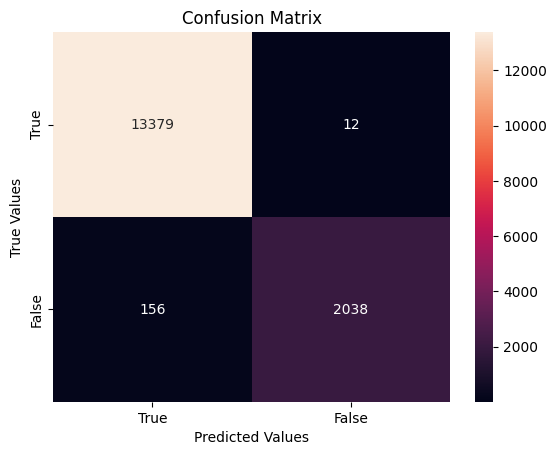

In [61]:
# Tạo confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, xticklabels=["True", "False"], yticklabels=["True", "False"], annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()